In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [78]:
data = pd.read_csv('traffic_accidents.csv')
df = data.copy()
df.head()

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_date                     209306 non-null  object 
 1   traffic_control_device         209306 non-null  object 
 2   weather_condition              209306 non-null  object 
 3   lighting_condition             209306 non-null  object 
 4   first_crash_type               209306 non-null  object 
 5   trafficway_type                209306 non-null  object 
 6   alignment                      209306 non-null  object 
 7   roadway_surface_cond           209306 non-null  object 
 8   road_defect                    209306 non-null  object 
 9   crash_type                     209306 non-null  object 
 10  intersection_related_i         209306 non-null  object 
 11  damage                         209306 non-null  object 
 12  prim_contributory_cause       

In [80]:
df.isnull().sum()

crash_date                       0
traffic_control_device           0
weather_condition                0
lighting_condition               0
first_crash_type                 0
trafficway_type                  0
alignment                        0
roadway_surface_cond             0
road_defect                      0
crash_type                       0
intersection_related_i           0
damage                           0
prim_contributory_cause          0
num_units                        0
most_severe_injury               0
injuries_total                   0
injuries_fatal                   0
injuries_incapacitating          0
injuries_non_incapacitating      0
injuries_reported_not_evident    0
injuries_no_indication           0
crash_hour                       0
crash_day_of_week                0
crash_month                      0
dtype: int64

In [81]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_units,209306.0,2.063300,0.396012,1.0,2.0,2.0,2.0,11.0
injuries_total,209306.0,0.382717,0.799720,0.0,0.0,0.0,1.0,21.0
injuries_fatal,209306.0,0.001859,0.047502,0.0,0.0,0.0,0.0,3.0
injuries_incapacitating,209306.0,0.038102,0.233964,0.0,0.0,0.0,0.0,7.0
injuries_non_incapacitating,209306.0,0.221241,0.614960,0.0,0.0,0.0,0.0,21.0
injuries_reported_not_evident,209306.0,0.121516,0.450865,0.0,0.0,0.0,0.0,15.0
injuries_no_indication,209306.0,2.244002,1.241175,0.0,2.0,2.0,3.0,49.0
crash_hour,209306.0,13.373047,5.603830,0.0,9.0,14.0,17.0,23.0
crash_day_of_week,209306.0,4.144024,1.966864,1.0,2.0,4.0,6.0,7.0
crash_month,209306.0,6.771822,3.427593,1.0,4.0,7.0,10.0,12.0


In [82]:
# sns.set(style="whitegrid", palette="muted")

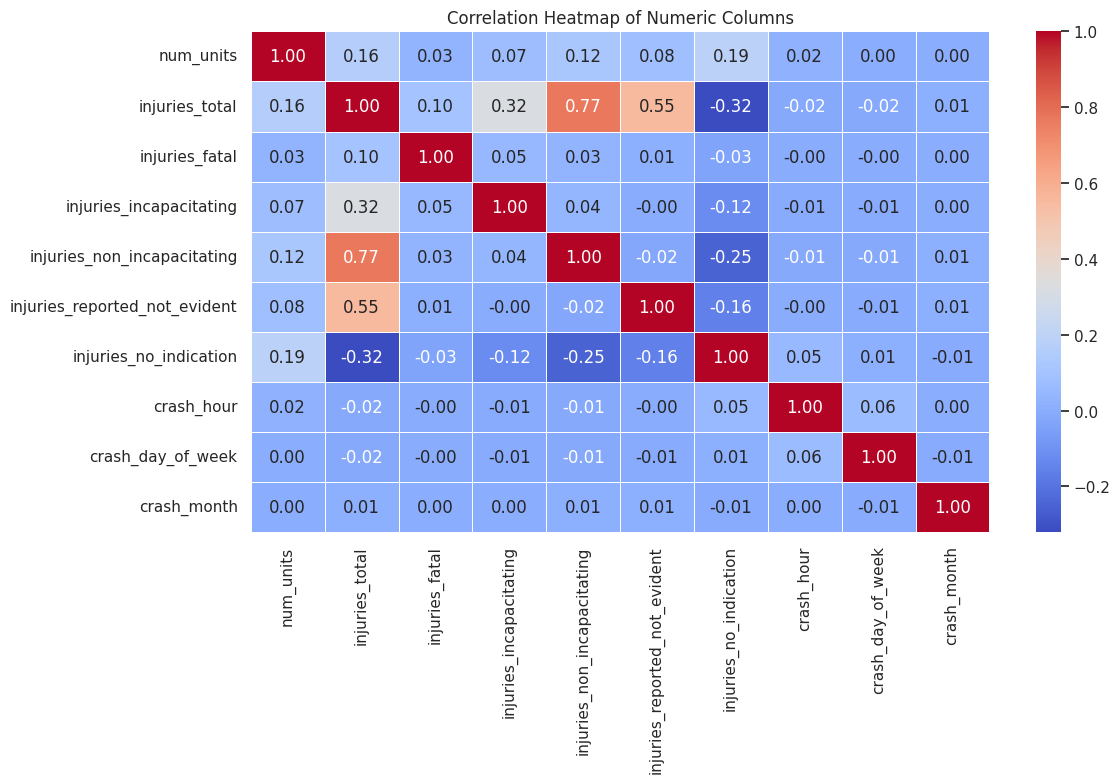

In [83]:
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

corr = numeric_cols.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Columns')
plt.tight_layout()
plt.show()

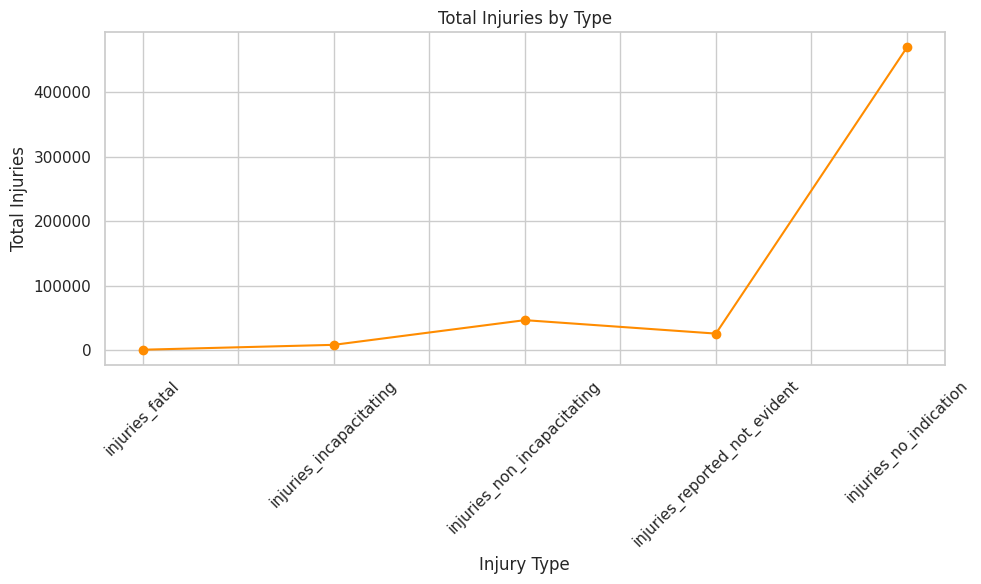

In [84]:

injury_types = ['injuries_fatal', 'injuries_incapacitating', 'injuries_non_incapacitating', 
                'injuries_reported_not_evident', 'injuries_no_indication']
injury_totals = df[injury_types].sum()


plt.figure(figsize=(10,6))
injury_totals.plot(kind='line', marker='o', color='darkorange')
plt.title('Total Injuries by Type')
plt.xlabel('Injury Type')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

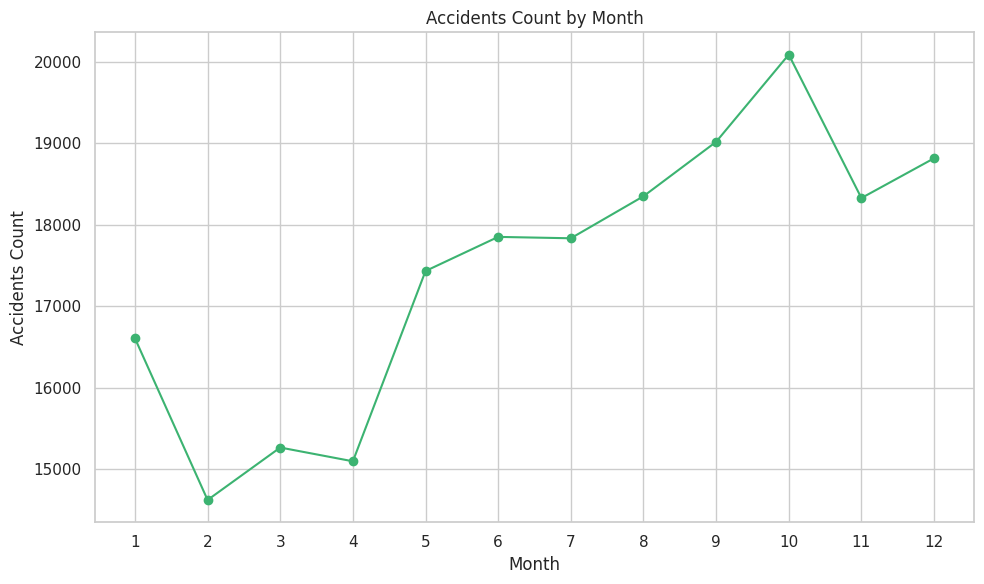

In [85]:
accidents_by_month = df['crash_month'].value_counts().sort_index()

plt.figure(figsize=(10,6))
accidents_by_month.plot(kind='line', marker='o', color='mediumseagreen')
plt.title('Accidents Count by Month')
plt.xlabel('Month')
plt.ylabel('Accidents Count')
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

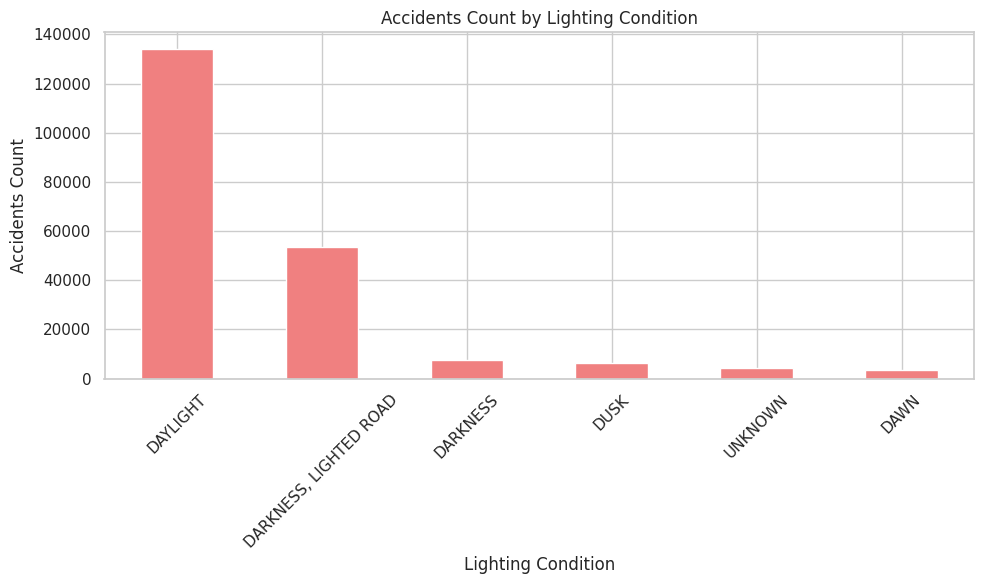

In [86]:
accidents_by_light = df['lighting_condition'].value_counts()

plt.figure(figsize=(10,6))
accidents_by_light.plot(kind='bar', color='lightcoral')
plt.title('Accidents Count by Lighting Condition')
plt.xlabel('Lighting Condition')
plt.ylabel('Accidents Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

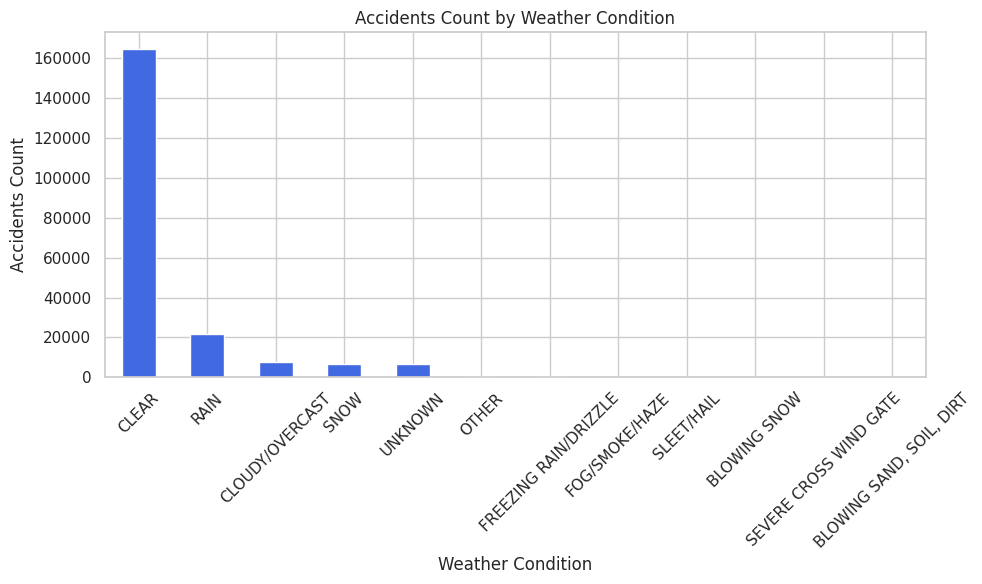

In [87]:

accidents_by_weather = df['weather_condition'].value_counts()


plt.figure(figsize=(10,6))
accidents_by_weather.plot(kind='bar', color='royalblue')
plt.title('Accidents Count by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Accidents Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


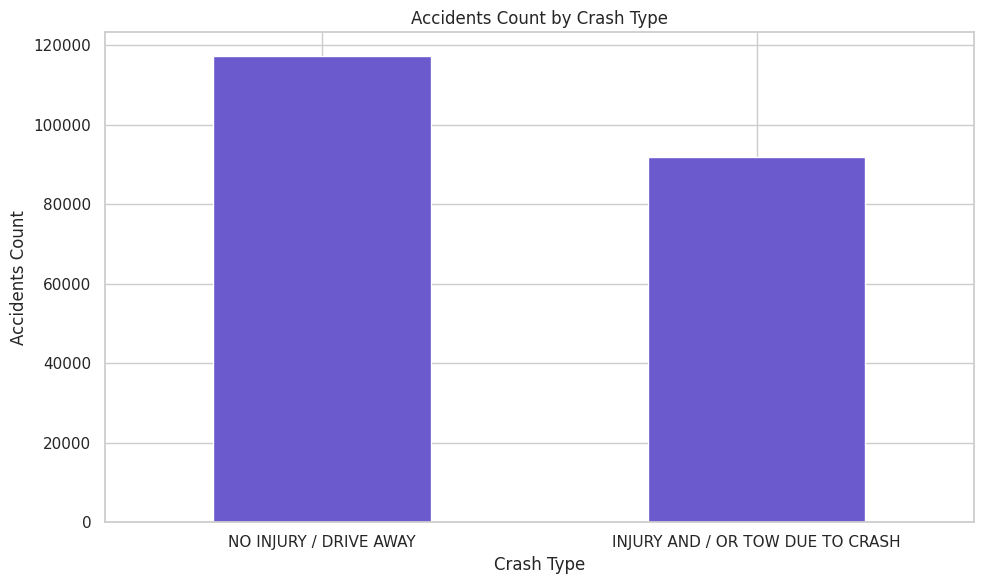

In [88]:
accidents_by_type = df['crash_type'].value_counts()

plt.figure(figsize=(10,6))
accidents_by_type.plot(kind='bar', color='slateblue')
plt.title('Accidents Count by Crash Type')
plt.xlabel('Crash Type')
plt.ylabel('Accidents Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


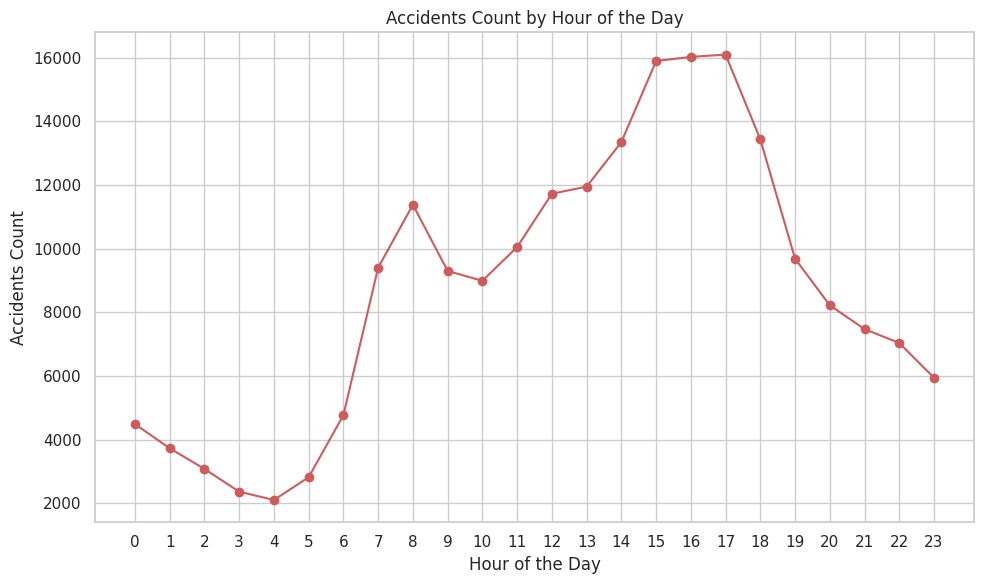

In [89]:
accidents_by_hour = df['crash_hour'].value_counts().sort_index()

plt.figure(figsize=(10,6))
accidents_by_hour.plot(kind='line', marker='o', color='indianred')
plt.title('Accidents Count by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Accidents Count')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

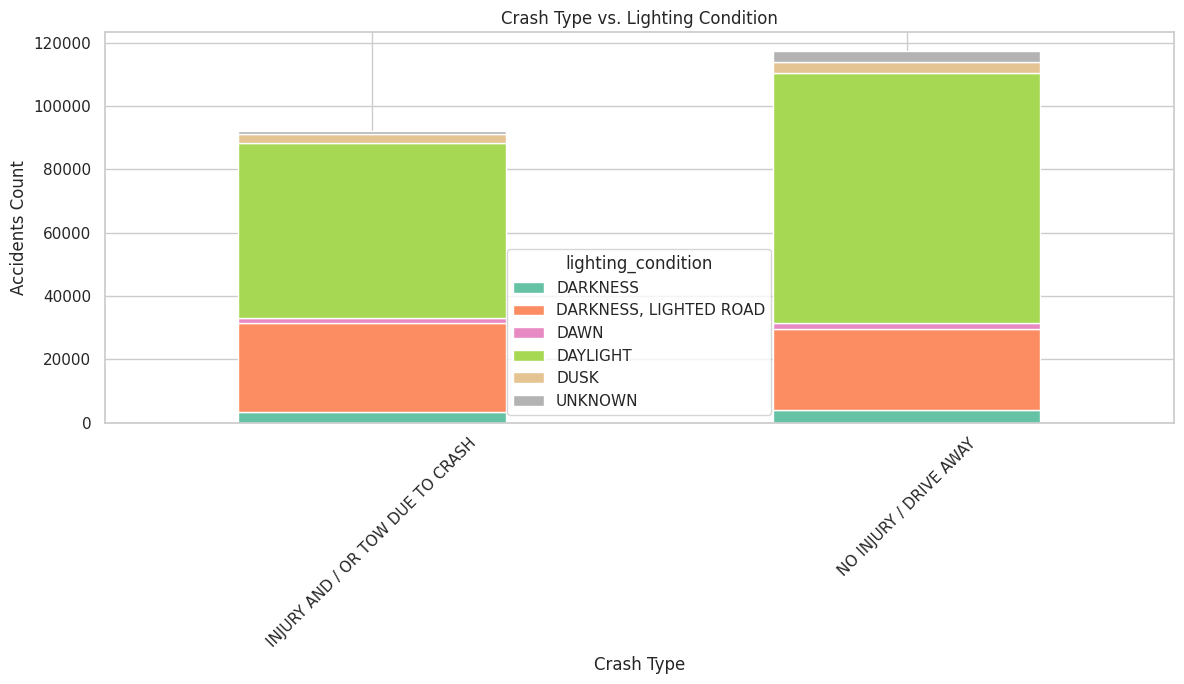

In [90]:
accidents_by_crash_and_light = pd.crosstab(df['crash_type'], df['lighting_condition'])

accidents_by_crash_and_light.plot(kind='bar', stacked=True, figsize=(12, 7), cmap='Set2')
plt.title('Crash Type vs. Lighting Condition')
plt.xlabel('Crash Type')
plt.ylabel('Accidents Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


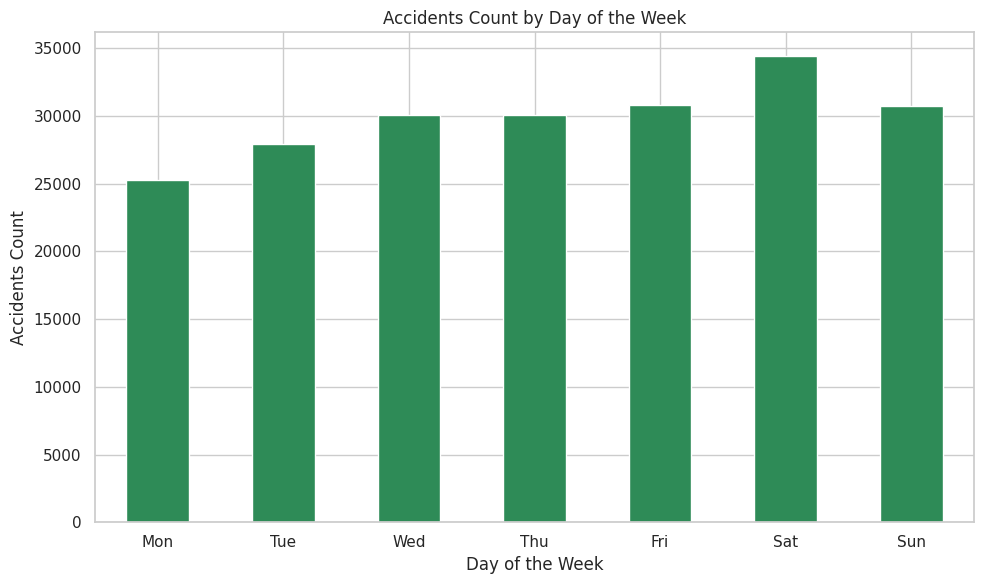

In [91]:
accidents_by_day = df['crash_day_of_week'].value_counts().sort_index()

plt.figure(figsize=(10,6))
accidents_by_day.plot(kind='bar', color='seagreen')
plt.title('Accidents Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Accidents Count')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],rotation=0)
plt.tight_layout()
plt.show()

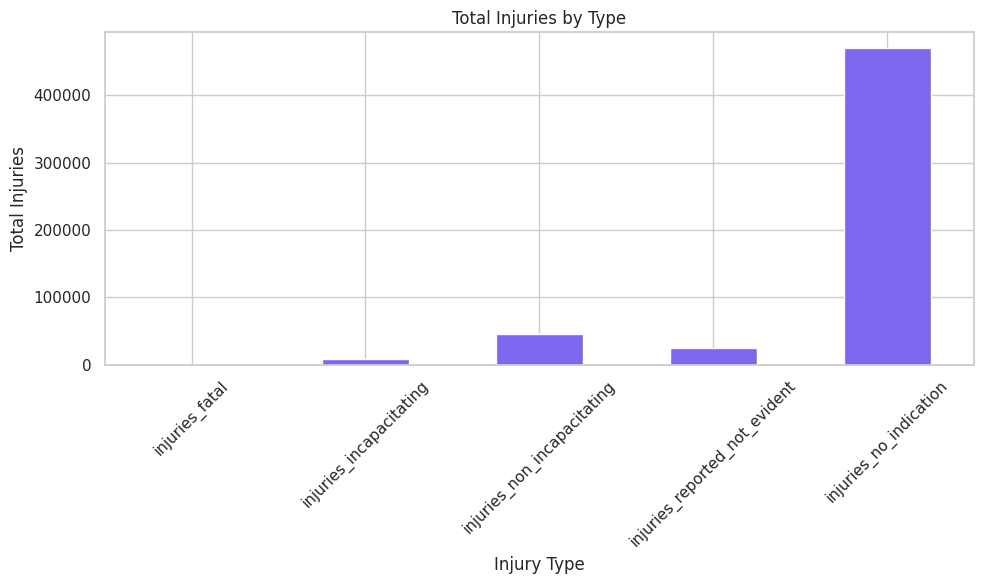

In [92]:
injuries_by_type = df[injury_types].sum()

plt.figure(figsize=(10,6))
injuries_by_type.plot(kind='bar', color='mediumslateblue')
plt.title('Total Injuries by Type')
plt.xlabel('Injury Type')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


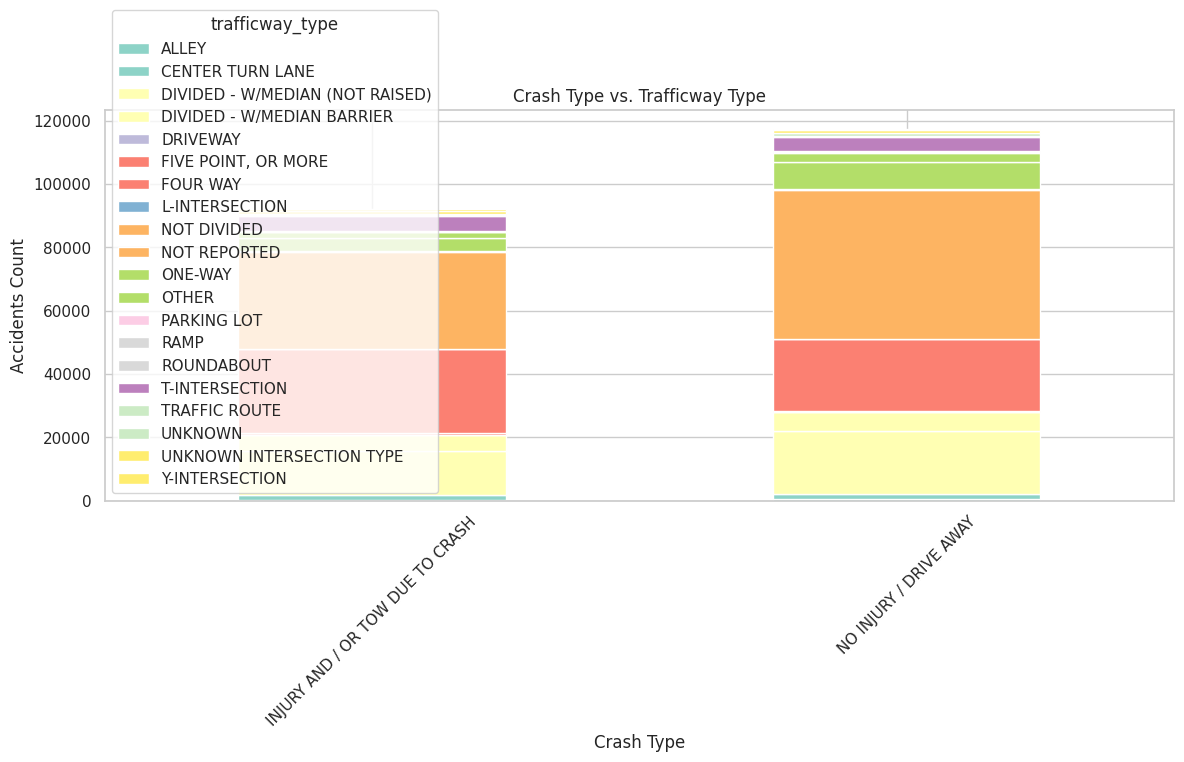

In [93]:
accidents_by_crash_and_road = pd.crosstab(df['crash_type'], df['trafficway_type'])

accidents_by_crash_and_road.plot(kind='bar', stacked=True, figsize=(12, 7), cmap='Set3')
plt.title('Crash Type vs. Trafficway Type')
plt.xlabel('Crash Type')
plt.ylabel('Accidents Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

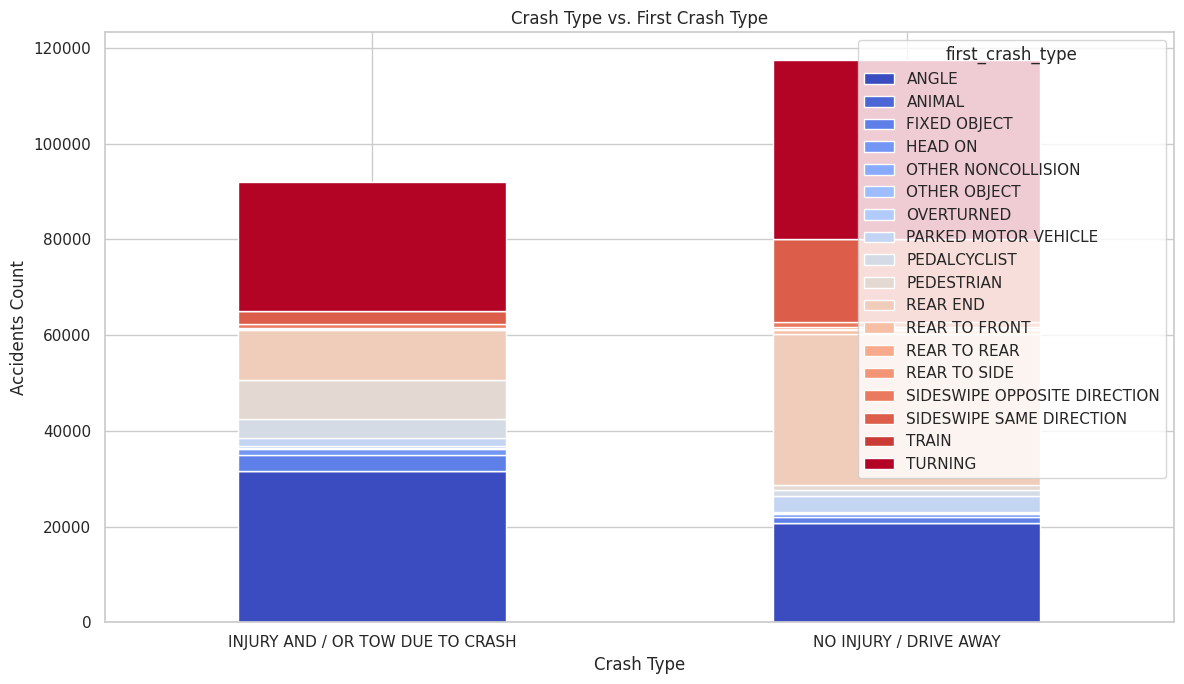

In [94]:
accidents_by_crash_and_first_type = pd.crosstab(df['crash_type'], df['first_crash_type'])

accidents_by_crash_and_first_type.plot(kind='bar', stacked=True, figsize=(12, 7), cmap='coolwarm')
plt.title('Crash Type vs. First Crash Type')
plt.xlabel('Crash Type')
plt.ylabel('Accidents Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

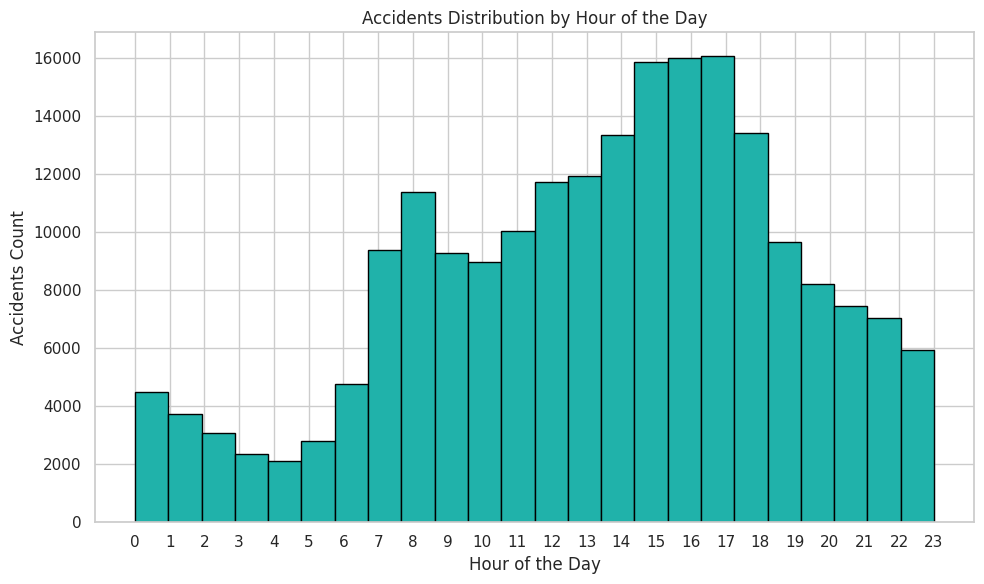

In [95]:
plt.figure(figsize=(10,6))
plt.hist(df['crash_hour'], bins=24, color='lightseagreen', edgecolor='black')
plt.title('Accidents Distribution by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Accidents Count')
plt.xticks(range(24))
plt.tight_layout()
plt.show()

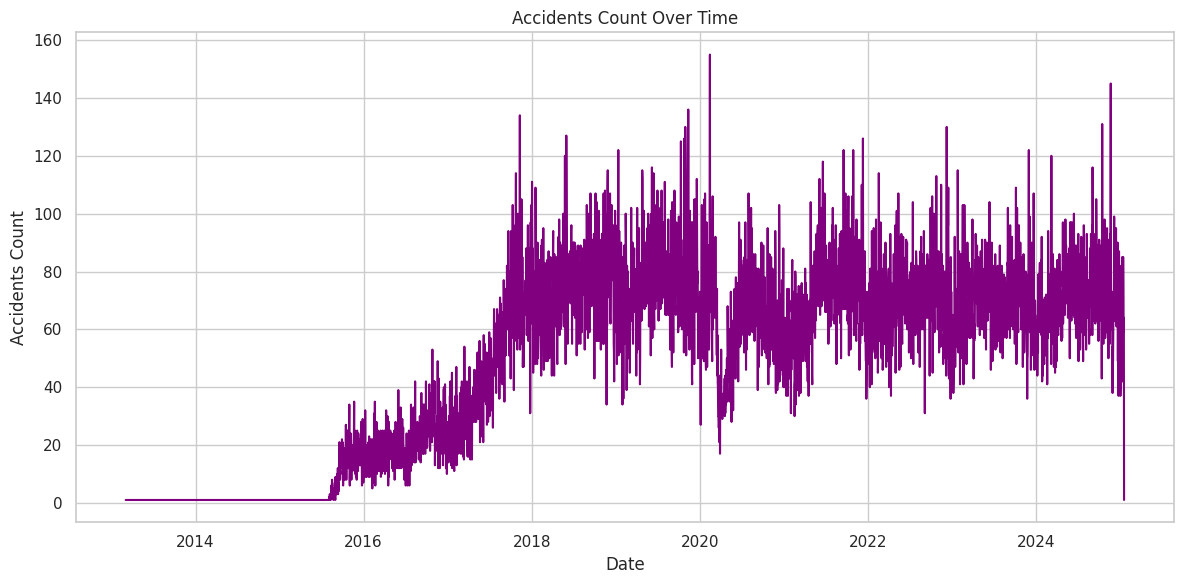

In [96]:
df['crash_date'] = pd.to_datetime(df['crash_date'])

accidents_by_date = df.groupby(df['crash_date'].dt.date).size()

plt.figure(figsize=(12,6))
accidents_by_date.plot(kind='line', color='purple')
plt.title('Accidents Count Over Time')
plt.xlabel('Date')
plt.ylabel('Accidents Count')
plt.tight_layout()
plt.show()

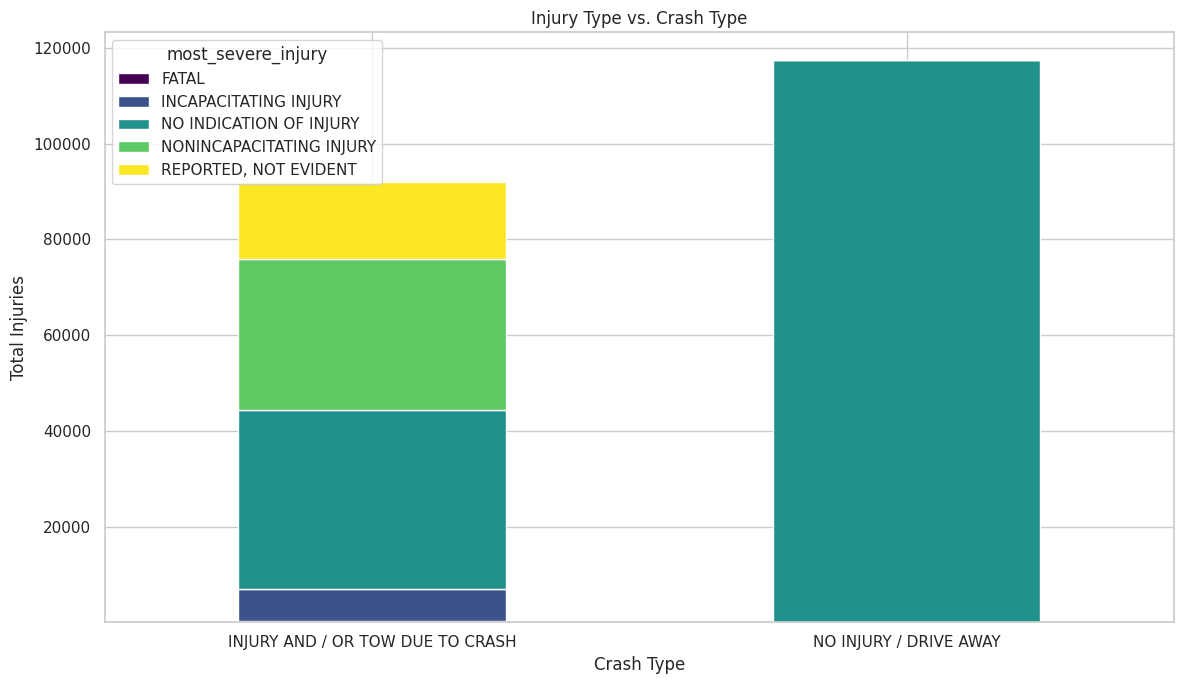

In [97]:
injury_by_crash_type = pd.crosstab(df['crash_type'], df['most_severe_injury'])

injury_by_crash_type.plot(kind='bar', stacked=True, figsize=(12,7), cmap='viridis')
plt.title('Injury Type vs. Crash Type')
plt.xlabel('Crash Type')
plt.ylabel('Total Injuries')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [98]:
label_encoders = {}

categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
   
    original_values = df[column].unique()
    
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])
    
    encoded_values = df[column].unique()
    
    decoded_values = label_encoders[column].inverse_transform(encoded_values)
    
    print(f"\n{column} Encoding and Decoding:")
    for enc, dec in zip(encoded_values, decoded_values):
        print(f"{enc} -> {dec}")


traffic_control_device Encoding and Decoding:
16 -> TRAFFIC SIGNAL
4 -> NO CONTROLS
15 -> STOP SIGN/FLASHER
17 -> UNKNOWN
6 -> OTHER
10 -> PEDESTRIAN CROSSING SIGN
9 -> OTHER WARNING SIGN
18 -> YIELD
2 -> FLASHING CONTROL SIGNAL
3 -> LANE USE MARKING
8 -> OTHER REG. SIGN
1 -> DELINEATORS
14 -> SCHOOL ZONE
11 -> POLICE/FLAGMAN
5 -> NO PASSING
13 -> RR CROSSING SIGN
12 -> RAILROAD CROSSING GATE
0 -> BICYCLE CROSSING SIGN
7 -> OTHER RAILROAD CROSSING

weather_condition Encoding and Decoding:
2 -> CLEAR
7 -> RAIN
10 -> SNOW
3 -> CLOUDY/OVERCAST
11 -> UNKNOWN
4 -> FOG/SMOKE/HAZE
1 -> BLOWING SNOW
5 -> FREEZING RAIN/DRIZZLE
6 -> OTHER
9 -> SLEET/HAIL
8 -> SEVERE CROSS WIND GATE
0 -> BLOWING SAND, SOIL, DIRT

lighting_condition Encoding and Decoding:
3 -> DAYLIGHT
1 -> DARKNESS, LIGHTED ROAD
4 -> DUSK
0 -> DARKNESS
5 -> UNKNOWN
2 -> DAWN

first_crash_type Encoding and Decoding:
17 -> TURNING
10 -> REAR END
0 -> ANGLE
2 -> FIXED OBJECT
11 -> REAR TO FRONT
15 -> SIDESWIPE SAME DIRECTION
14 -> 

In [99]:
df = df.drop(columns=['crash_date'])

In [100]:
X = df.drop(columns=['crash_type'])
y = df['crash_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8366298791266542
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.75      0.80     18512
           1       0.82      0.90      0.86     23350

    accuracy                           0.84     41862
   macro avg       0.84      0.83      0.83     41862
weighted avg       0.84      0.84      0.84     41862

Confusion Matrix:
[[13956  4556]
 [ 2283 21067]]


In [106]:
lr_model = LogisticRegression(max_iter=1000, random_state=42)

lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

Accuracy: 0.8315895083846926
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.67      0.78     18512
           1       0.79      0.96      0.86     23350

    accuracy                           0.83     41862
   macro avg       0.86      0.81      0.82     41862
weighted avg       0.85      0.83      0.83     41862

Confusion Matrix:
[[12384  6128]
 [  922 22428]]


In [107]:
dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

Accuracy: 0.7923415030337777
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.78      0.77     18512
           1       0.82      0.80      0.81     23350

    accuracy                           0.79     41862
   macro avg       0.79      0.79      0.79     41862
weighted avg       0.79      0.79      0.79     41862

Confusion Matrix:
[[14461  4051]
 [ 4642 18708]]


In [108]:
knn_model = KNeighborsClassifier()

knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

Accuracy: 0.7452104533944867
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.60      0.68     18512
           1       0.73      0.86      0.79     23350

    accuracy                           0.75     41862
   macro avg       0.75      0.73      0.73     41862
weighted avg       0.75      0.75      0.74     41862

Confusion Matrix:
[[11186  7326]
 [ 3340 20010]]


In [109]:
models = ['Random Forest', 'Logistic Regression', 'Decision Tree','KNN']
accuracies = [accuracy_score(y_test, rf_model.predict(X_test)),
              accuracy_score(y_test, lr_model.predict(X_test)),
              accuracy_score(y_test, dt_model.predict(X_test)),
              accuracy_score(y_test, knn_model.predict(X_test)),
             ]

model_comparison = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies
})

print(model_comparison)

                 Model  Accuracy
0        Random Forest  0.836630
1  Logistic Regression  0.831590
2        Decision Tree  0.792342
3                  KNN  0.745210
